In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [102]:
df = pd.read_csv(r"C:\Freelance\Document\House Test Data.csv")

In [103]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [104]:
df2 = df.copy()

encoder = LabelEncoder()
df2["date"] = encoder.fit_transform(df2["date"])
df2["street"] = encoder.fit_transform(df2["street"])
df2["city"] = encoder.fit_transform(df2["street"])
df2["statezip"] = encoder.fit_transform(df2["street"])
df2["country"] = encoder.fit_transform(df2["street"])

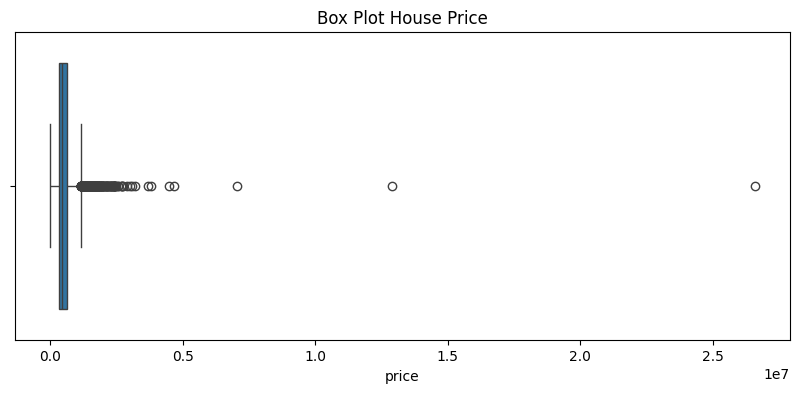

In [105]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df2["price"])
plt.title("Box Plot House Price")
plt.show()

In [106]:
z_score = stats.zscore(df2["price"])
z_score_df = np.abs(z_score)
filtered_entries = (z_score_df < 3)
df2 = df2[filtered_entries]

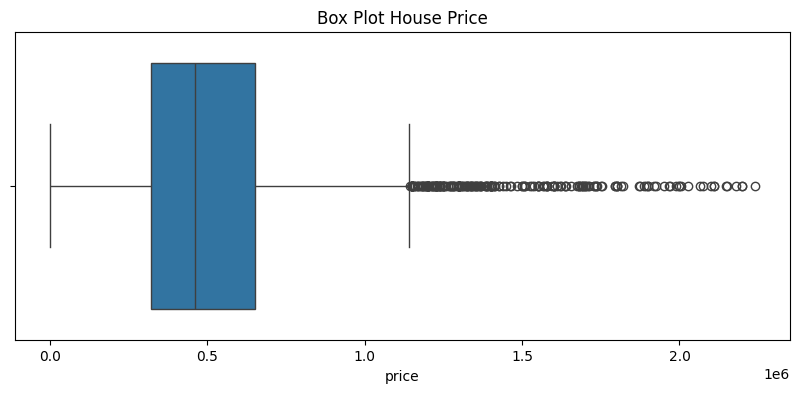

In [107]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df2["price"])
plt.title("Box Plot House Price")
plt.show()

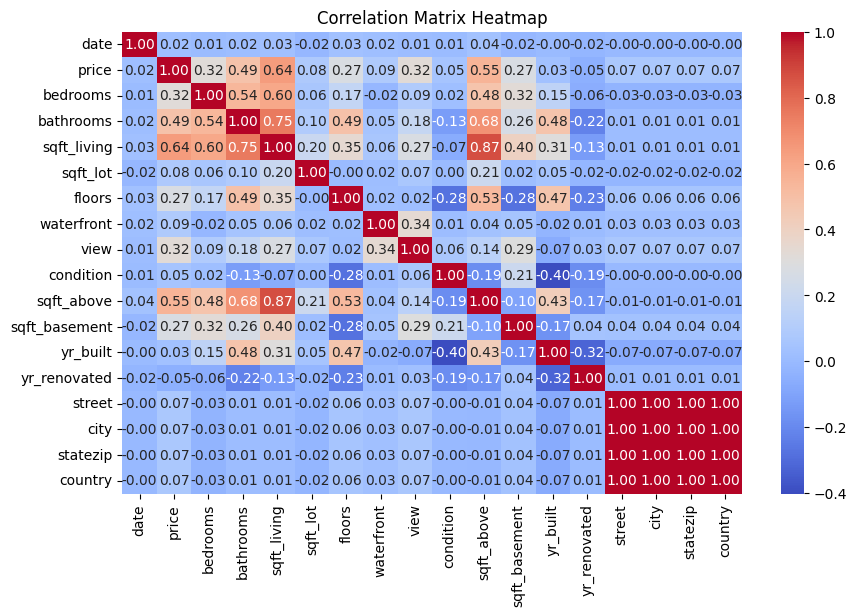

In [109]:
df2.replace(0, np.nan, inplace=True)
null_percentage = df2.isnull().sum() * 100 / len(df2)
print(null_percentage)

date              1.445466
price             1.073149
bedrooms          0.043802
bathrooms         0.043802
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       99.430574
view             90.407359
condition         0.000000
sqft_above        0.000000
sqft_basement    59.964958
yr_built          0.000000
yr_renovated     59.417433
street            0.021901
city              0.021901
statezip          0.021901
country           0.021901
dtype: float64


In [110]:
df2 = df2.drop(columns=["yr_renovated", "sqft_basement", "view", "waterfront"])
df2.dropna()
df2["price_per_sqft"] = (df2["price"] / df2["sqft_living"]).round(2)

In [111]:
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,street,city,statezip,country,price_per_sqft
0,NaN,313000.000000,3.0,1.50,1340,7912,1.5,3,1340,1955,1522.0,1522.0,1522.0,1522.0,233.58
2,NaN,342000.000000,3.0,2.00,1930,11947,1.0,4,1930,1966,2291.0,2291.0,2291.0,2291.0,177.20
3,NaN,420000.000000,3.0,2.25,2000,8030,1.0,4,1000,1963,4263.0,4263.0,4263.0,4263.0,210.00
4,NaN,550000.000000,4.0,2.50,1940,10500,1.0,4,1140,1976,4352.0,4352.0,4352.0,4352.0,283.51
5,NaN,490000.000000,2.0,1.00,880,6380,1.0,3,880,1938,3521.0,3521.0,3521.0,3521.0,556.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,68.0,308166.666667,3.0,1.75,1510,6360,1.0,4,1510,1954,3447.0,3447.0,3447.0,3447.0,204.08
4596,68.0,534333.333333,3.0,2.50,1460,7573,2.0,3,1460,1983,960.0,960.0,960.0,960.0,365.98
4597,68.0,416904.166667,3.0,2.50,3010,7014,2.0,3,3010,2009,4033.0,4033.0,4033.0,4033.0,138.51
4598,69.0,203400.000000,4.0,2.00,2090,6630,1.0,3,1070,1974,3498.0,3498.0,3498.0,3498.0,97.32


In [112]:
df2.replace(np.nan, 0, inplace=True)

In [113]:
x = df2.drop(columns=["price"])
y = df2["price"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=42)

In [114]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)


In [115]:
print("Mean Abosolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Abosolute Error:  90199.95698185258
R2 Score:  0.7857970883299215


In [116]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)

In [117]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  8726.095074623652
R2 Score:  0.9944542707593008


In [118]:
gradien_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradien_model.fit(x_train, y_train)
y_pred = gradien_model.predict(x_test)

In [119]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  15177.736408719245
R2 Score:  0.9945334537592665


In [120]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

In [121]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  18195.103952921643
R2 Score:  0.9873239429673486


In [122]:
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm_model.fit(x_train, y_train)
y_pred = lgbm_model.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2262
[LightGBM] [Info] Number of data points in the train set: 2739, number of used features: 14
[LightGBM] [Info] Start training from score 532264.598240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [123]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  18042.326818266873
R2 Score:  0.9899128890913301


In [124]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

In [125]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  59973.300465605826
R2 Score:  0.8778685353737286


In [126]:
print(f"shape = {df2.shape}")
print(f"shape = {df.shape}")

shape = (4566, 15)
shape = (4600, 18)


In [127]:
best_model = lgbm_model